In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from skimage.transform import resize
from skimage.io import imread
import cv2
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
input_dir = '/content/drive/My Drive/herb_dataset_test'
categories = ['đinh lăng', 'ngọc trai', 'lá lốt', 'mơ tam thể', 'đuôi chuột', 'khế chua', 'trầu không']
data = []
labels = []

# Load and process each image
for category_idx, category in enumerate(categories):
    category_path = os.path.join(input_dir, category)
    for file in os.listdir(category_path):
        img_path = os.path.join(category_path, file)
        print(f"Processing {img_path}")
        img = imread(img_path)
        img = resize(img, (32, 32, 3))  # Resize to  with 3 color channels
        data.append(img.flatten())  # Flatten the image for storage
        labels.append(category_idx)  # Label as the index of the category

# Convert lists to arrays for machine learning compatibility
data = np.array(data)
labels = np.array(labels)

print("Data shape:", data.shape)
print("Labels shape:", labels.shape)

Processing /content/drive/My Drive/herb_dataset_test/đinh lăng/7l7POy.36cef821079a.jpg
Processing /content/drive/My Drive/herb_dataset_test/đinh lăng/7lDdXz.b0d820c76171.jpg
Processing /content/drive/My Drive/herb_dataset_test/đinh lăng/7l7tmS.ba5522f1df9f.jpg
Processing /content/drive/My Drive/herb_dataset_test/đinh lăng/7lD1wy.6ae1105d3013.jpg
Processing /content/drive/My Drive/herb_dataset_test/đinh lăng/7lsnDP.d4ab432144e3.jpg
Processing /content/drive/My Drive/herb_dataset_test/đinh lăng/7lDoGL.789ed6b89375.jpg
Processing /content/drive/My Drive/herb_dataset_test/đinh lăng/7l7vA1.ead03b4ab0f7.jpg
Processing /content/drive/My Drive/herb_dataset_test/đinh lăng/7la654.8ea0c506d904.jpg
Processing /content/drive/My Drive/herb_dataset_test/đinh lăng/7laMNr.2ffd42584c33.jpg
Processing /content/drive/My Drive/herb_dataset_test/đinh lăng/7lDupa.4694d4ef2ac0.jpg
Processing /content/drive/My Drive/herb_dataset_test/đinh lăng/7l73B9.2a752082e69b.jpg
Processing /content/drive/My Drive/herb_dat

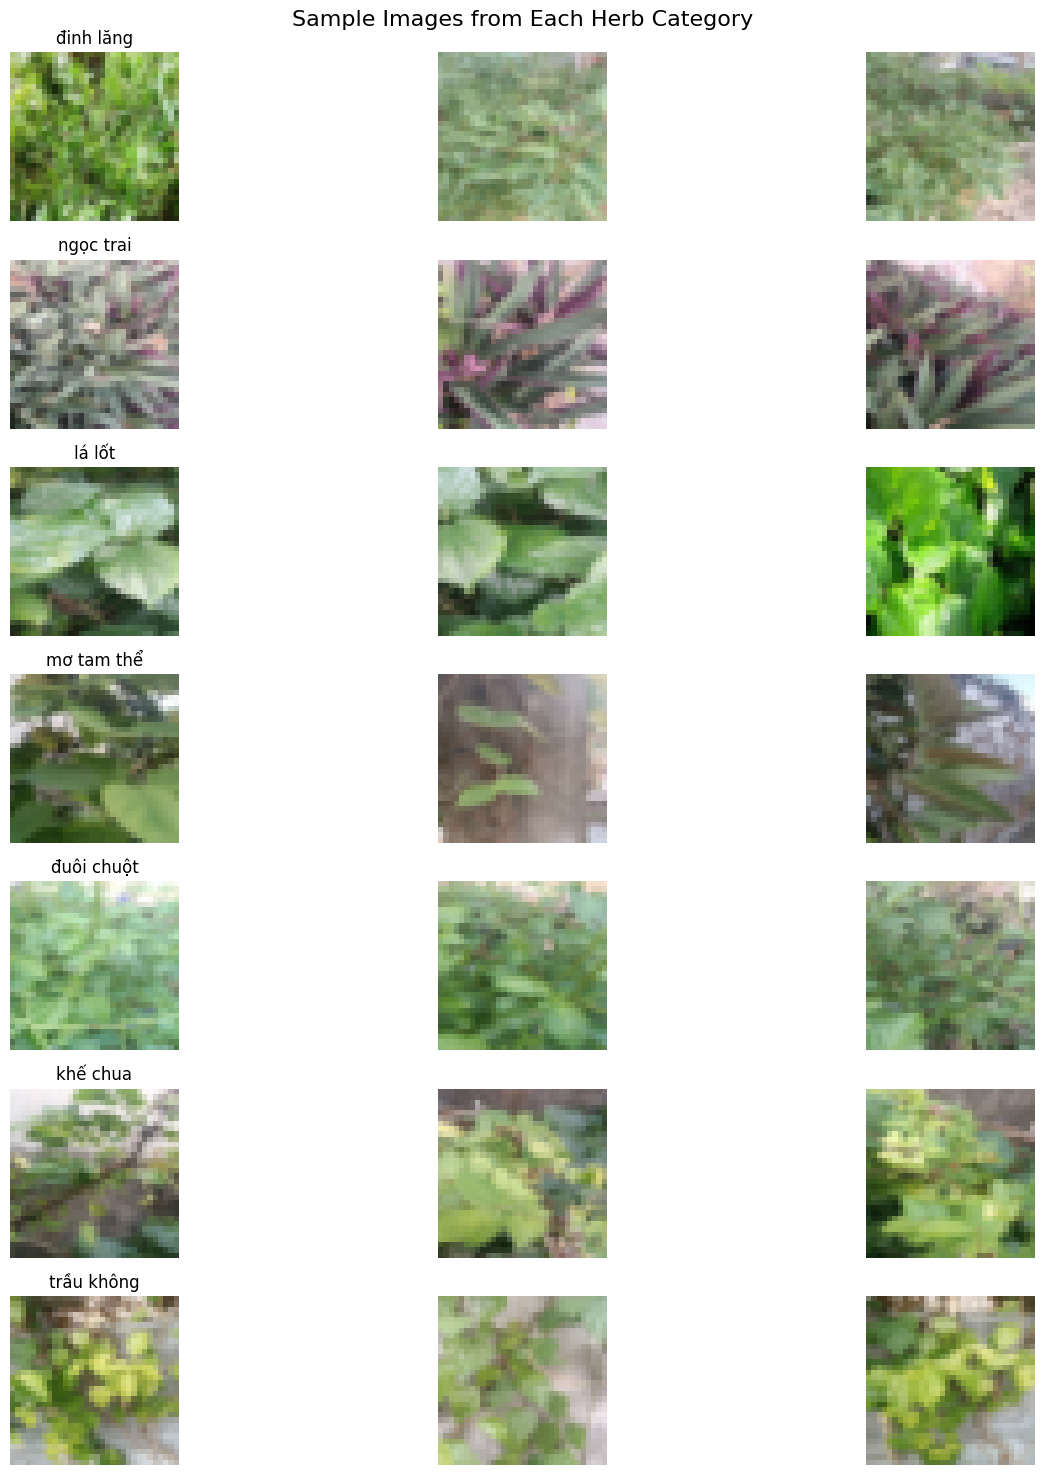

In [ ]:
def plot_sample_images_per_category(data, labels, categories, n_images=3):
    fig, axes = plt.subplots(len(categories), n_images, figsize=(15, 15))
    fig.suptitle("Sample Images from Each Herb Category", fontsize=16)

    # Go through each category and select images
    for category_idx, category in enumerate(categories):
        # Find indices where labels match the category index
        category_indices = np.where(labels == category_idx)[0]

        # Randomly select n_images from this category's indices
        selected_indices = np.random.choice(category_indices, n_images, replace=False)

        # Plot the selected images
        for i, img_idx in enumerate(selected_indices):
            img = data[img_idx].reshape(32, 32, 3)
            ax = axes[category_idx, i]
            ax.imshow(img)
            ax.axis('off')
            if i == 0:
                ax.set_title(category)  # Display category name only on the first image
    plt.tight_layout()
    plt.show()

# Display 3 sample images for each category
plot_sample_images_per_category(data, labels, categories, n_images=3)

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

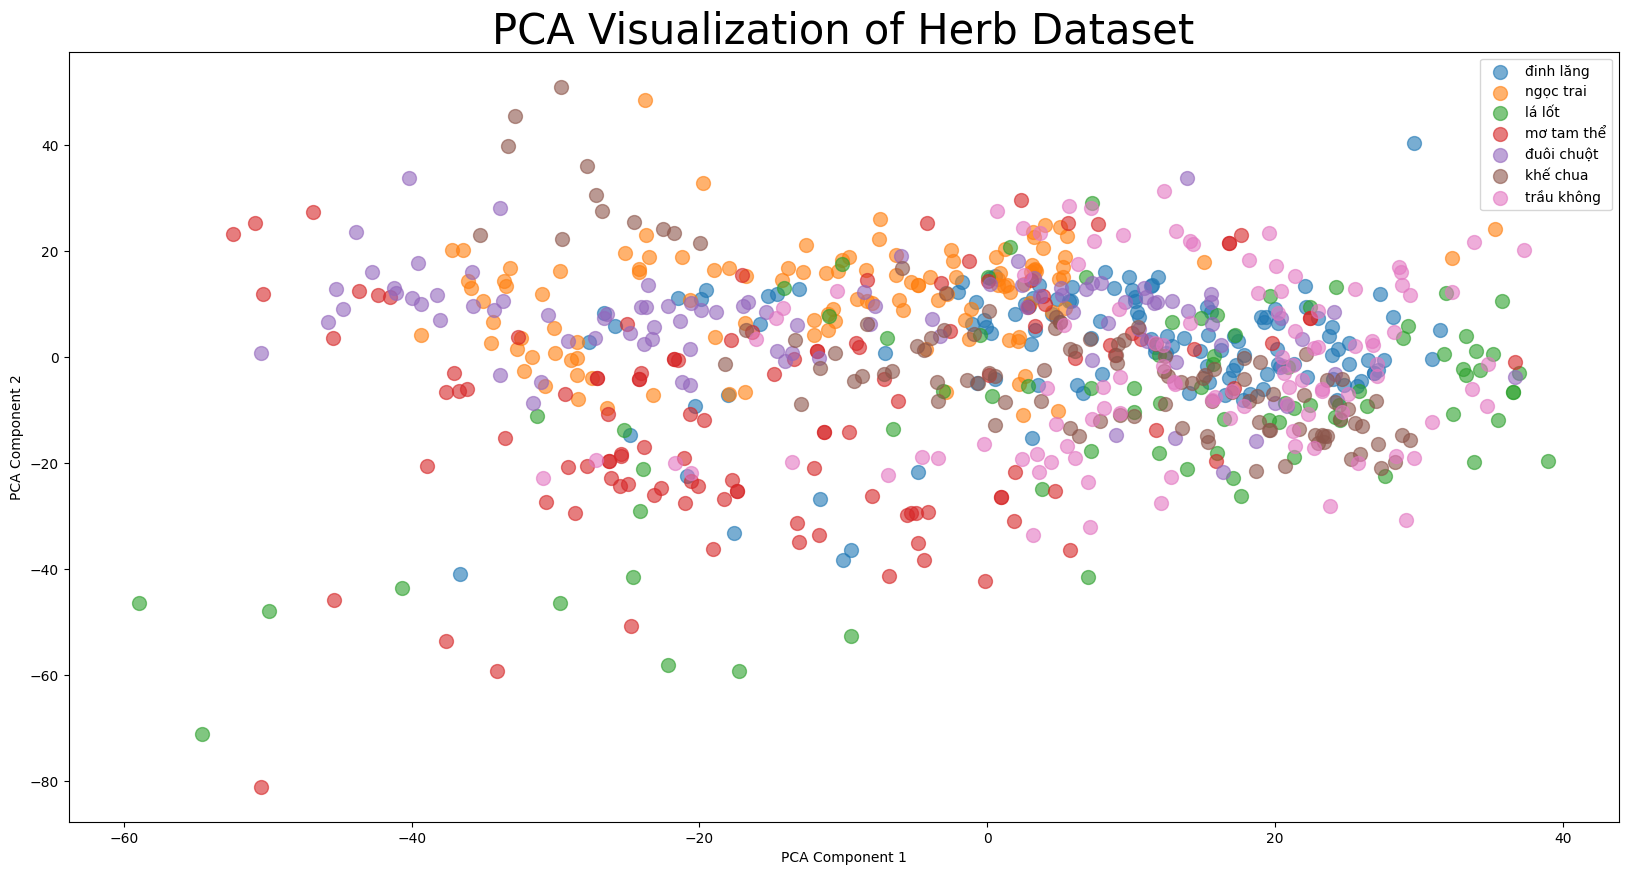

In [ ]:
pca = PCA(n_components=2)  # Giảm xuống 2 chiều để dễ vẽ
data_pca = pca.fit_transform(data_scaled)

# Vẽ biểu đồ
plt.figure(figsize=(20, 10))
for category_idx, category in enumerate(categories):
    plt.scatter(data_pca[labels == category_idx, 0],
                data_pca[labels == category_idx, 1],
                label=category, s=100, alpha=0.6)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization of Herb Dataset', fontsize ="30")
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


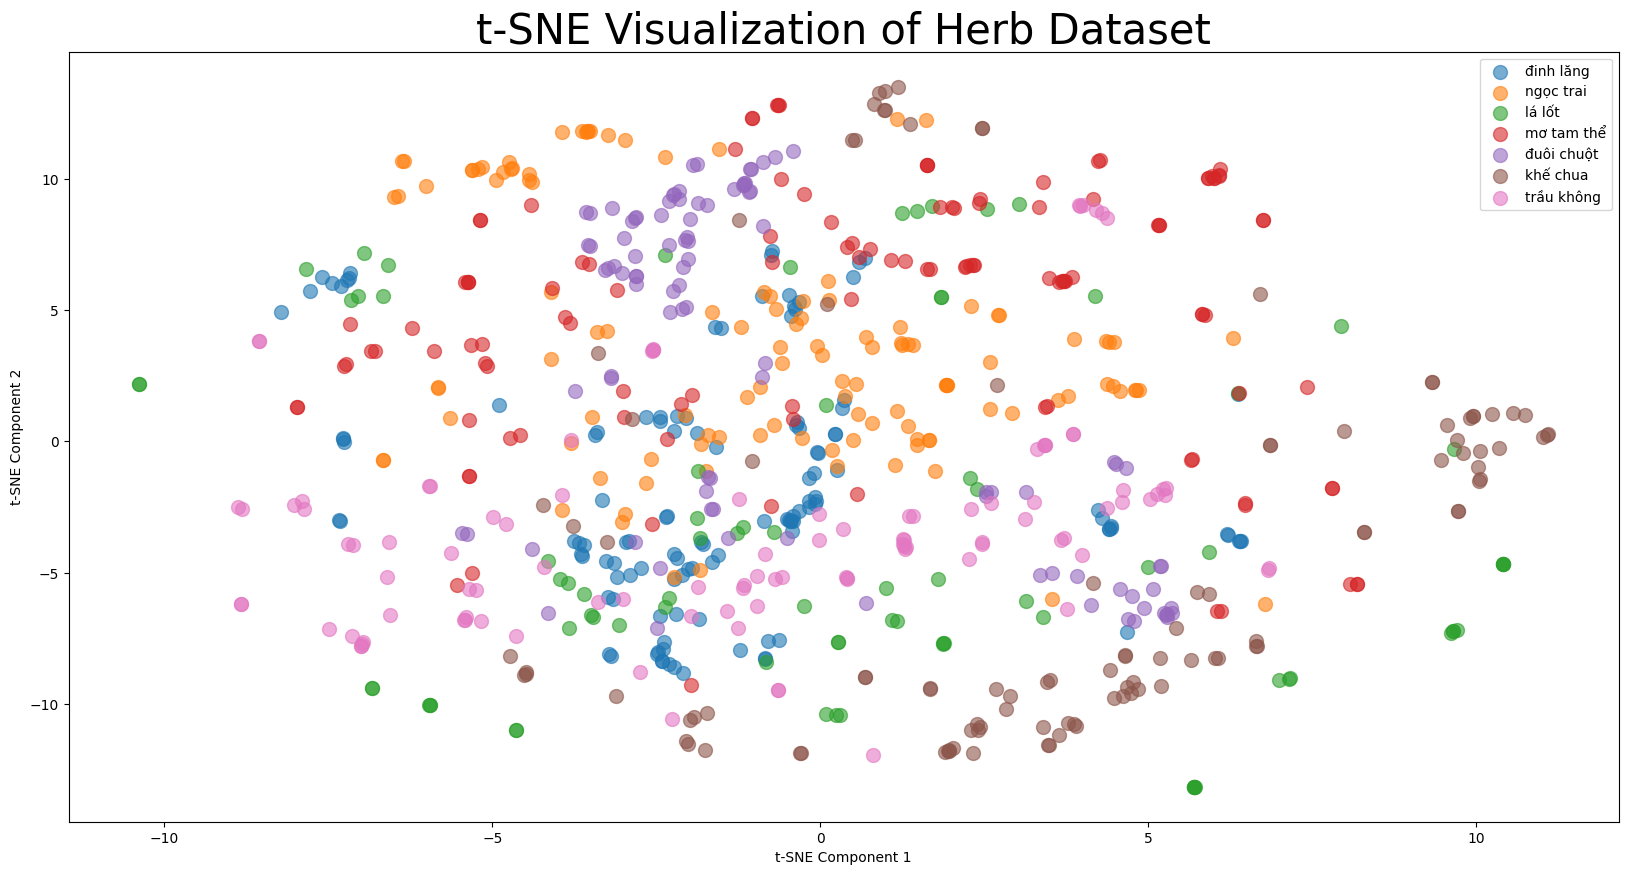

In [ ]:
tsne = TSNE(n_components=2, random_state=0, perplexity=30, n_iter=300)
data_tsne = tsne.fit_transform(data_scaled)

# Vẽ biểu đồ
plt.figure(figsize=(20, 10))
for category_idx, category in enumerate(categories):
    plt.scatter(data_tsne[labels == category_idx, 0],
                data_tsne[labels == category_idx, 1],
                label=category, s=100, alpha = 0.6)

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Herb Dataset', fontsize = "30")
plt.legend()
plt.show()

In [ ]:
# Chia tập train-test
x_train, x_test, y_train, y_test = train_test_split(data_scaled, labels, test_size=0.4, random_state=42)

In [ ]:
tsne = TSNE(n_components=3)
x_tsne = tsne.fit_transform(x_train)

In [ ]:
# pca = PCA(n_components=3)
# x_pca = pca.fit_transform(x_train)

In [ ]:
 #Just base to ss rf and dt

 # SVM mặc định
svm_default = SVC(class_weight='balanced', kernel= 'linear')
svm_default.fit(x_train, y_train)
svm_default_score = accuracy_score(y_test, svm_default.predict(x_test))

# SVM poly
svm_poly = SVC(class_weight='balanced', kernel= 'poly')
svm_poly.fit(x_train, y_train)
svm_poly_score = accuracy_score(y_test, svm_poly.predict(x_test))

#SVM RBF
svm_rbf = SVC(class_weight='balanced', kernel= 'rbf')
svm_rbf.fit(x_train, y_train)
svm_rbf_score = accuracy_score(y_test, svm_rbf.predict(x_test))

In [ ]:
# Decision Tree mặc định
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(x_train, y_train)
dt_default_score = accuracy_score(y_test, dt_default.predict(x_test))

# Decision Tree AdaBoost
dt_adaboost = AdaBoostClassifier(estimator=DecisionTreeClassifier(), algorithm='SAMME', random_state=42)
dt_adaboost.fit(x_train, y_train)
dt_adaboost_score = accuracy_score(y_test, dt_adaboost.predict(x_test))


In [ ]:
# Random Forest mặc định
rf_default = RandomForestClassifier(n_estimators=100, random_state=42)
rf_default.fit(x_train, y_train)
rf_default_score = accuracy_score(y_test, rf_default.predict(x_test))

# Random Forest AdaBoost
rf_adaboost = AdaBoostClassifier(estimator=RandomForestClassifier(n_estimators=10), algorithm='SAMME', random_state=42)
rf_adaboost.fit(x_train, y_train)
rf_adaboost_score = accuracy_score(y_test, rf_adaboost.predict(x_test))


In [ ]:
# In kết quả so sánh cho từng mô hình
print("SVM (linear kernel) Accuracy:", svm_default_score)
#print("SVM (poly kernel) Accuracy:", svm_poly_score)
#print("SVM (rbf kernel) Accuracy:", svm_rbf_score)

print("Decision Tree Accuracy:", dt_default_score)
#print("Decision Tree + AdaBoost Accuracy:", dt_adaboost_score)

print("Random Forest Accuracy:", rf_default_score)
#print("Random Forest + AdaBoost Accuracy:", rf_adaboost_score)


SVM (linear kernel) Accuracy: 0.8013245033112583
SVM (poly kernel) Accuracy: 0.5298013245033113
SVM (rbf kernel) Accuracy: 0.8443708609271523
Decision Tree Accuracy: 0.5331125827814569
Decision Tree + AdaBoost Accuracy: 0.5165562913907285
Random Forest Accuracy: 0.7781456953642384
Random Forest + AdaBoost Accuracy: 0.6854304635761589


In [ ]:
cv = cross_val_score(svm_default, data, labels, cv=3)
print("Cross-validation scores SVM Default:", cv)
cvsvmpoly = cross_val_score(svm_poly, data, labels, cv=3)
print("Cross-validation scores SVM Poly:", cvsvmpoly)
cvsvmrbf = cross_val_score(svm_rbf, data, labels, cv=3)
print("Cross-validation scores SVM RBF:", cvsvmrbf)

cvdt = cross_val_score(dt_default, data, labels, cv=3)
print("Cross-validation scores Decision Tree:", cvdt)
cvdt_adaboost = cross_val_score(dt_adaboost, data, labels, cv=3)
print("Cross-validation scores Decision Tree + AdaBoost:", cvdt_adaboost)

cvrf = cross_val_score(rf_default, data, labels, cv=3)
print("Cross-validation scores Random Forest:", cvrf)
cvrf_adaboost = cross_val_score(rf_adaboost, data, labels, cv=3)
print("Cross-validation scores Random Forest + AdaBoost:", cvrf_adaboost)

Cross-validation scores SVM Default: [0.78486056 0.8247012  0.74501992]
Cross-validation scores SVM Poly: [0.80478088 0.83665339 0.73705179]
Cross-validation scores SVM RBF: [0.83665339 0.89243028 0.80876494]
Cross-validation scores Decision Tree: [0.50199203 0.45418327 0.44621514]
Cross-validation scores Decision Tree + AdaBoost: [0.50199203 0.43824701 0.41434263]
Cross-validation scores Random Forest: [0.74501992 0.80876494 0.70119522]
Cross-validation scores Random Forest + AdaBoost: [0.64940239 0.6374502  0.53784861]


In [ ]:
import pandas as pd
from tabulate import tabulate

# Tạo một từ điển với các kết quả cross-validation
results = {
    "Model": [
        "SVM (Default)", "SVM (Poly)", "SVM (RBF)",
        "Decision Tree", "Decision Tree + AdaBoost",
        "Random Forest", "Random Forest + AdaBoost"
    ],
    "Accuracy": [
        svm_default_score, svm_poly_score, svm_rbf_score,
        dt_default_score, dt_adaboost_score,
        rf_default_score, rf_adaboost_score
    ],
    "Cross-Validation Scores": [
        cv, cvsvmpoly, cvsvmrbf,
        cvdt, cvdt_adaboost,
        cvrf, cvrf_adaboost
    ]
}

# Tạo DataFrame
df = pd.DataFrame(results)

# In bảng
print(df)

# Hiển thị bảng đẹp hơn (tùy chọn)
print(tabulate(df, headers='keys', tablefmt='grid'))


                      Model  Accuracy  \
0             SVM (Default)  0.801325   
1                SVM (Poly)  0.529801   
2                 SVM (RBF)  0.844371   
3             Decision Tree  0.533113   
4  Decision Tree + AdaBoost  0.516556   
5             Random Forest  0.778146   
6  Random Forest + AdaBoost  0.685430   

                             Cross-Validation Scores  
0  [0.7848605577689243, 0.8247011952191236, 0.745...  
1  [0.8047808764940239, 0.8366533864541833, 0.737...  
2  [0.8366533864541833, 0.8924302788844621, 0.808...  
3  [0.50199203187251, 0.4541832669322709, 0.44621...  
4  [0.50199203187251, 0.43824701195219123, 0.4143...  
5  [0.7450199203187251, 0.8087649402390438, 0.701...  
6  [0.649402390438247, 0.6374501992031872, 0.5378...  
+----+--------------------------+------------+------------------------------------+
|    | Model                    |   Accuracy | Cross-Validation Scores            |
+====+==========================+============+=================

In [ ]:
y_pred_svm = svm_default.predict(x_test)
y_pred_rf = rf_default.predict(x_test)
y_pred_dt = dt_default.predict(x_test)

In [ ]:
def plot_pca_tsne(data, labels, title):
    # Trực quan hóa bằng PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(data)

    plt.figure(figsize=(20, 10))
    # Trực quan hóa bằng PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(data)

    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette="tab10", s=100, alpha=0.6)
    plt.title(f"{title} - PCA", fontsize = "30")

    # Trực quan hóa bằng t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(data)

    plt.subplot(1, 2, 2)
    sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=labels, palette="tab10", s=100, alpha=0.6)
    plt.title(f"{title} - t-SNE", fontsize = "30")
    plt.show()

<Figure size 1200x500 with 0 Axes>

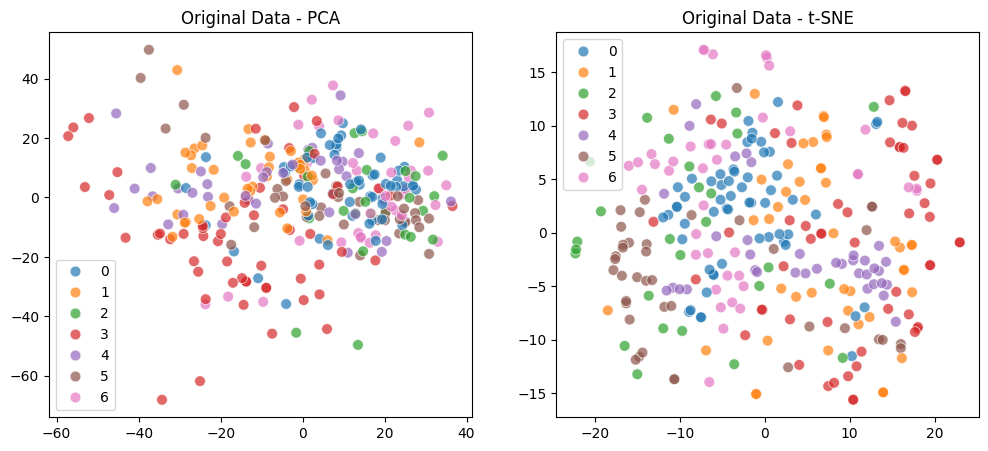

<Figure size 1200x500 with 0 Axes>

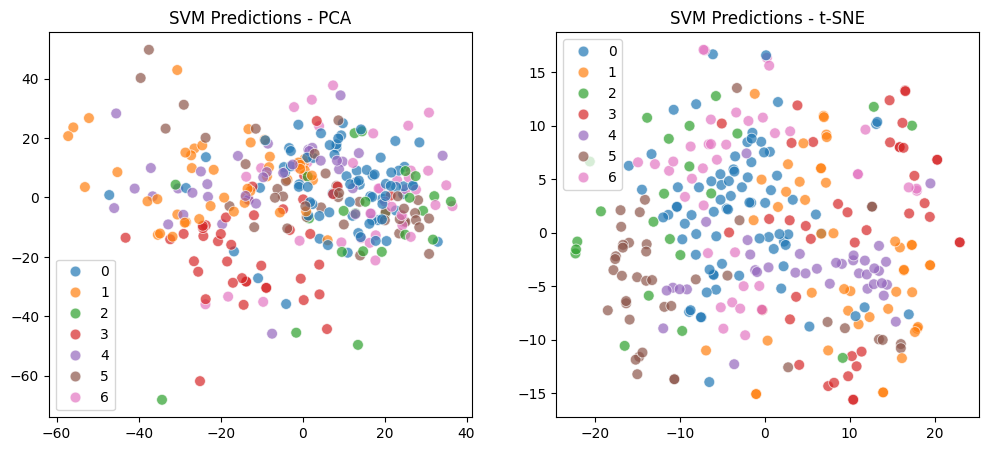

<Figure size 1200x500 with 0 Axes>

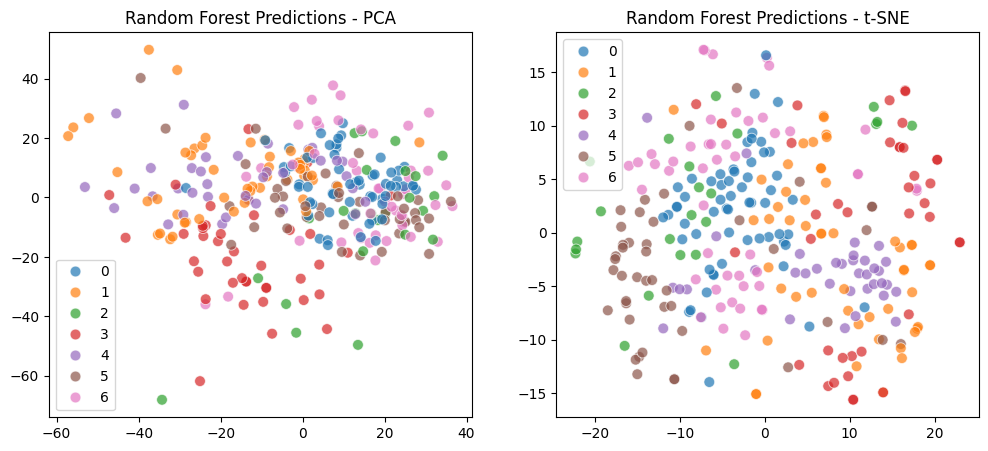

<Figure size 1200x500 with 0 Axes>

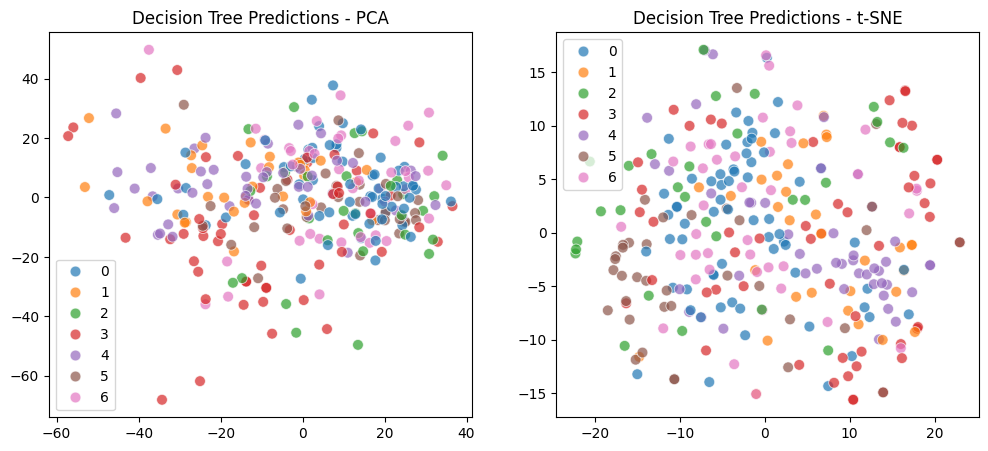

In [ ]:
# Trực quan hóa dự đoán của từng mô hình
plot_pca_tsne(x_test, y_pred_svm, "SVM Predictions")
plot_pca_tsne(x_test, y_pred_rf, "Random Forest Predictions")
plot_pca_tsne(x_test, y_pred_dt, "Decision Tree Predictions")


In [ ]:
def calculate_best_params(grid):
    svm  = SVC();
    svm_cv = GridSearchCV(svm, grid, cv = 3)

    svm_cv.fit(x_train,y_train)
    best_model = svm_cv.best_estimator_
    train_accuracy = best_model.score(x_train, y_train)
    print("Best Parameters:",svm_cv.best_params_)
    print("Best Cross-validated Score:",svm_cv.best_score_)
    print("Test Score:",svm_cv.score(x_test,y_test))
    print("Training accuracy:", train_accuracy)

In [ ]:
grid = {
    'C': [0.1, 1, 10, 100],
    'kernel' : ["linear","poly","rbf","sigmoid"],
    'degree' : [1,3,5,7],   #poly only
    'gamma': ['scale', 0.01, 0.1, 1, 10]
}

In [ ]:
calculate_best_params(grid)

Best Parameters: {'C': 10, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-validated Score: 0.8515378955114055
Test Score: 0.8675496688741722
Training accuracy: 1.0


In [ ]:
grid1 = {
    'C': [10],
    'kernel' : ["rbf"],
    'degree' : [1],
    'gamma': ['scale']
}

In [ ]:
svm  = SVC();
svm_cv = GridSearchCV(svm, grid1, cv = 3)
svm_cv.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [10], 'degree': [1], 'gamma': ['scale'],
                         'kernel': ['rbf']})

In [ ]:
def calculate_best_params_ovr(grid):
    svm  = SVC(decision_function_shape='ovr');
    svm_cv_ovr = GridSearchCV(svm, grid, cv = 3)

    svm_cv_ovr.fit(x_train,y_train)
    best_model = svm_cv_ovr.best_estimator_
    train_accuracy = best_model.score(x_train, y_train)
    print("Best Parameters:",svm_cv_ovr.best_params_)
    print("Best Cross-validated Score:",svm_cv_ovr.best_score_)
    print("Test Score:",svm_cv_ovr.score(x_test,y_test))
    print("Training accuracy:", train_accuracy)

In [ ]:
calculate_best_params_ovr(grid)

Best Parameters: {'C': 10, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-validated Score: 0.8515378955114055
Test Score: 0.8675496688741722
Training accuracy: 1.0


In [ ]:
y_pred_grid = svm_cv.predict(x_test)

<Figure size 2000x1000 with 0 Axes>

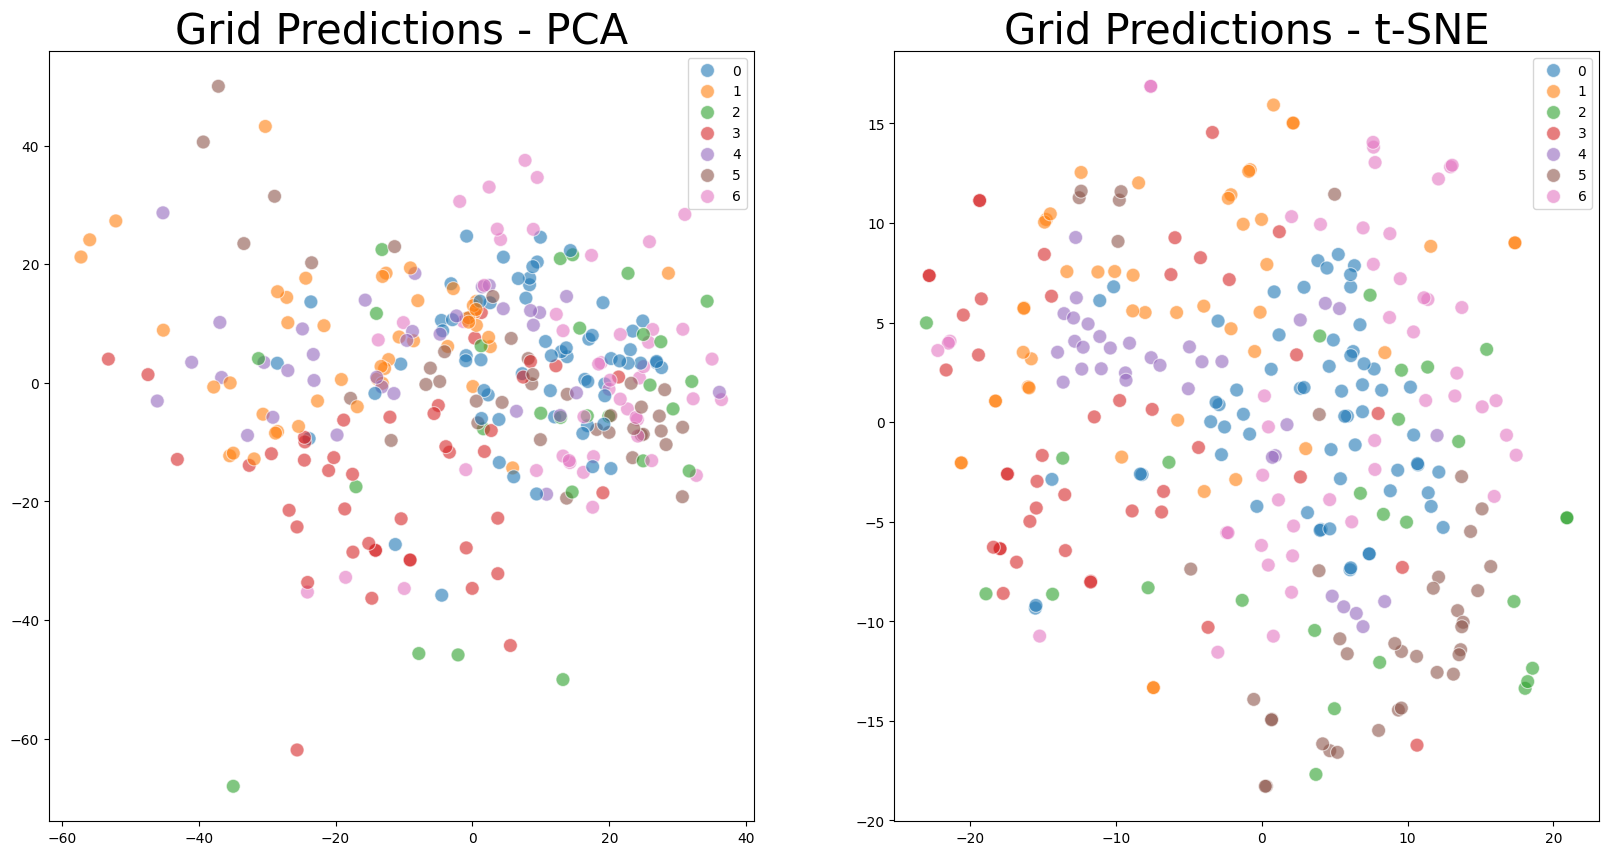

In [ ]:
plot_pca_tsne(x_test, y_pred_grid, "Grid Predictions")

In [ ]:
cm_svm_default = confusion_matrix(y_test, y_pred_svm)
cm_dt_default = confusion_matrix(y_test, y_pred_dt)
cm_rf_default = confusion_matrix(y_test, y_pred_rf)
cm_svm_grid = confusion_matrix(y_test, y_pred_grid)

In [ ]:
accuracy_svm_default = svm_default.score(x_test, y_test)
accuracy_svm_grid = svm_cv.score(x_test,y_test)
accuracy_dt_default = dt_default.score(x_test, y_test)
accuracy_rf_default = rf_default.score(x_test, y_test)

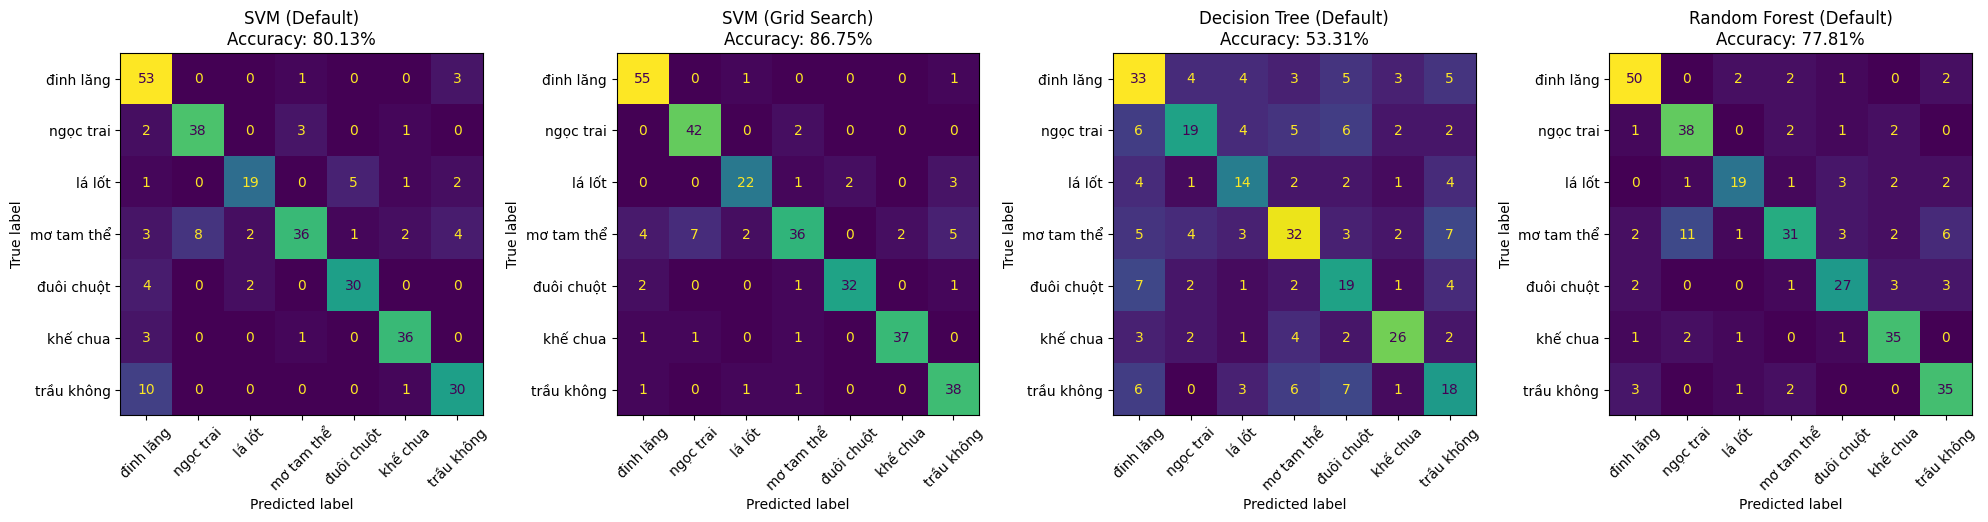

In [ ]:
cms = [
    (cm_svm_default, f"SVM (Default)\nAccuracy: {accuracy_svm_default:.2%}"),
    (cm_svm_grid, f"SVM (Grid Search)\nAccuracy: {accuracy_svm_grid:.2%}"),
    (cm_dt_default, f"Decision Tree (Default)\nAccuracy: {accuracy_dt_default:.2%}"),
    (cm_rf_default, f"Random Forest (Default)\nAccuracy: {accuracy_rf_default:.2%}")

]

# Tạo một hình ảnh với các ma trận nhầm lẫn
fig, axes = plt.subplots(1, len(cms), figsize=(20, 15))

# Vòng lặp qua các ma trận và hiển thị
for ax, (cm, title) in zip(axes, cms):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=categories)
    disp.plot(ax=ax, colorbar=False)
    ax.set_title(title)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
def classify_new_image(img_path):
    # Read and preprocess the new image
    img = imread(img_path)
    img = resize(img, (32, 32, 3))  # resize to match training data size
    img_flattened = img.flatten().reshape(1, -1)  # flatten and reshape to match model input

    # Scale the image using the trained scaler
    img_scaled = scaler.transform(img_flattened)

    # Predict the class
    prediction = svm_cv.predict(img_scaled)

    # Map index to category label
    category_label = categories[prediction[0]]

    return category_label

The predicted category for the new image is: ngọc trai


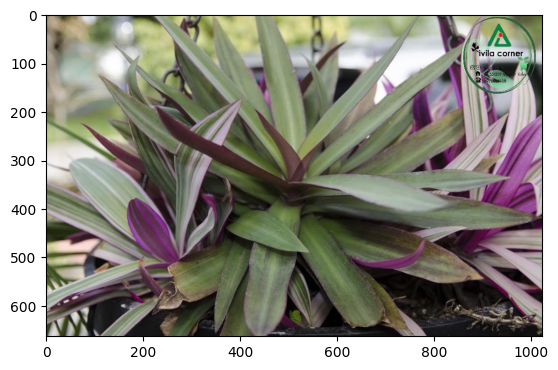

In [ ]:
img1 = '7l76zJ.10aeac89e6c1.jpg'
img2 = 'ngc-trai_1.jpg'
img3 = 'tac-dung-cua-la-lot-trong-viec-chua-benh-tieu-duong.jpg'
img4 = 'photo-1657001761741-16570017631851312489748.jpg'
img5 = 'trau_khong.jpg'
img6 ='20211213_091721_201643_cong_dung_cua_cay_d_max_1800x1800_jpg_5793d5fc1c.jpg'
img7 = 'untitled-1_20240427190054.jpg'
predicted_category = classify_new_image(img2)
plt.imshow(imread(img2))
print(f"The predicted category for the new image is: {predicted_category}")

The predicted category for the new image is: đuôi chuột


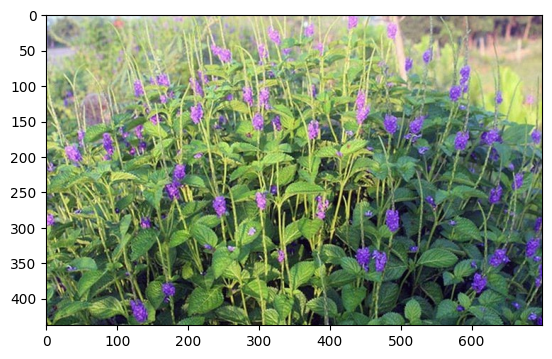

In [ ]:
img1 = '7l76zJ.10aeac89e6c1.jpg'
img2 = '20211213_091721_201643_cong_dung_cua_cay_d_max_1800x1800_jpg_5793d5fc1c (1).jpg'
img3 = 'tac-dung-cua-la-lot-trong-viec-chua-benh-tieu-duong.jpg'
img4 = 'photo-1657001761741-16570017631851312489748.jpg'
img5 = 'trau_khong.jpg'
img6 ='20211213_091721_201643_cong_dung_cua_cay_d_max_1800x1800_jpg_5793d5fc1c.jpg'
img7 = 'untitled-1_20240427190054.jpg'
predicted_category = classify_new_image(img2)
plt.imshow(imread(img2))
print(f"The predicted category for the new image is: {predicted_category}")

The predicted category for the new image is: lá lốt


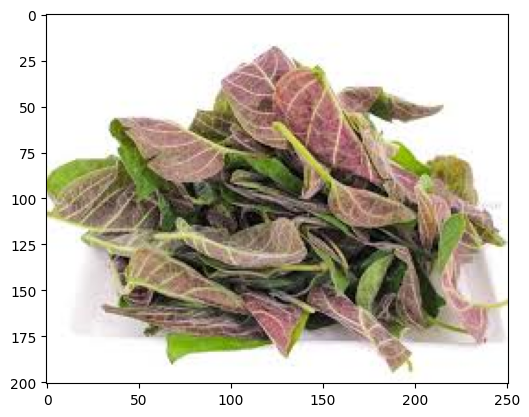

In [ ]:
imgzzz = 'tải xuống (2).jpg'
predicted_category = classify_new_image(imgzzz)
plt.imshow(imread(imgzzz))
print(f"The predicted category for the new image is: {predicted_category}")